In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

df = pd.read_csv("A:/Data_Science_Course/data/titanic.csv")

print("Dataset Загружен!")
print (f"Размер: {df.shape}")
df.head()

Dataset Загружен!
Размер: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


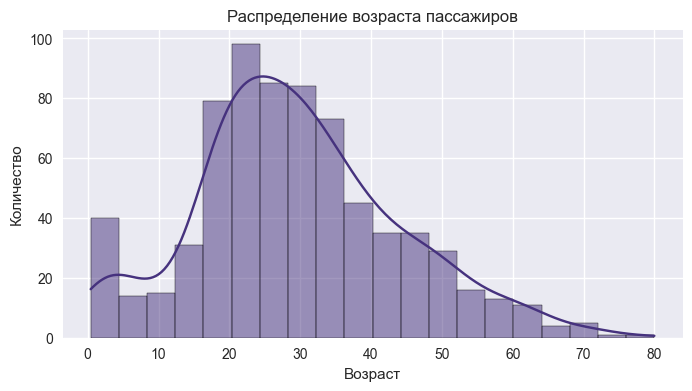

In [2]:
# 3. Распределение возраста
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

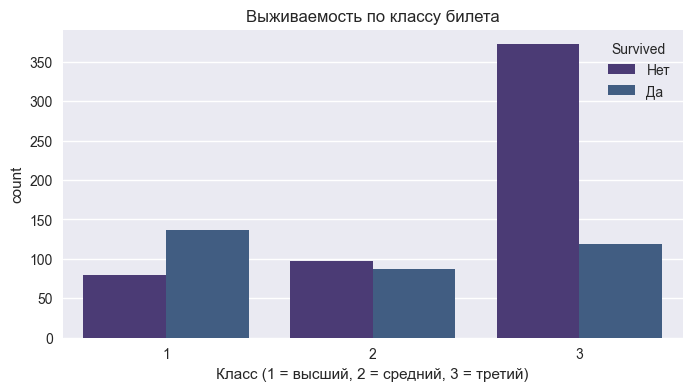

In [3]:
# 4. Выживаемость по классу
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Выживаемость по классу билета')
plt.xlabel('Класс (1 = высший, 2 = средний, 3 = третий)')
plt.legend(title='Survived', labels=['Нет', 'Да'])
plt.show()

In [ ]:
# Удаляем бесполезные столбцы
df_clean = df.drop(columns = ['PassengerId','Name','Ticket','Cabin'])
print('Столбцы удалены. Новая форма:', df_clean.shape)
df_clean.head()

Столбцы удалены. Новая форма: (891, 8)
177


In [13]:
# Заполним Age медианой по полу и классу
df_clean['Age'] = df_clean.groupby(['Sex','Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())    
)
print("Пропусков в Age осталось:",df_clean['Age'].isnull().sum())

Пропусков в Age осталось: 0


In [11]:
# Заполним Embarked модой
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
print("Пропусков в Embarked осталось:", df_clean['Embarked'].isnull().sum())

Пропусков в Embarked осталось: 0


In [14]:
# Финальная проверка
print("Итоговый размер:", df_clean.shape)
print("\nПропуски:")
print(df_clean.isnull().sum())

Итоговый размер: (891, 8)

Пропуски:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


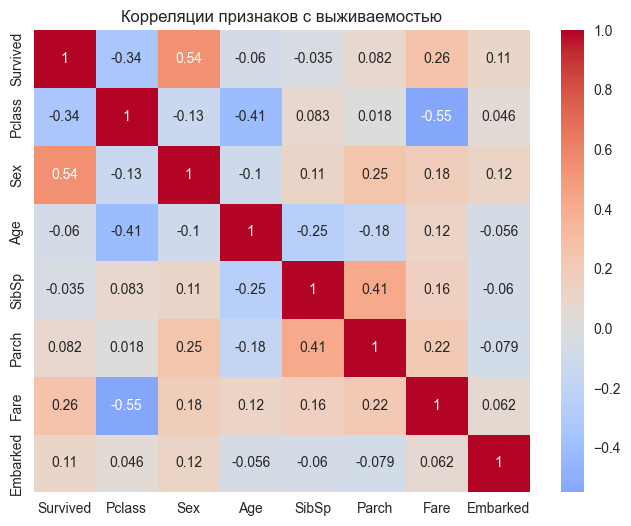

In [15]:
# Кодируем категориальные признаки в числа (для корреляции)
df_encoded = df_clean.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male':0,'female':1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S':0, 'C':1, 'Q':2})
# Heatmap корреляций
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm',center=0)
plt.title('Корреляции признаков с выживаемостью')
plt.show()

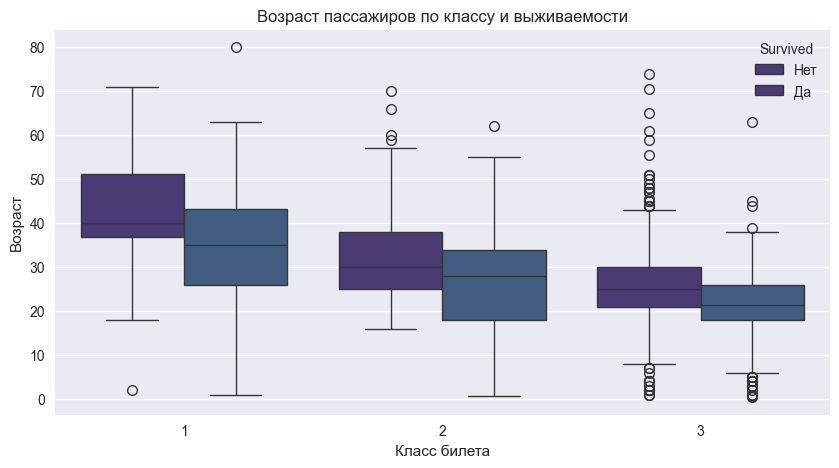

In [17]:
# Boxplot возраста
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='Pclass', y='Age', hue='Survived')
plt.title('Возраст пассажиров по классу и выживаемости')
plt.xlabel('Класс билета')
plt.ylabel('Возраст')
plt.legend(title='Survived', labels=['Нет', 'Да'])
plt.show()

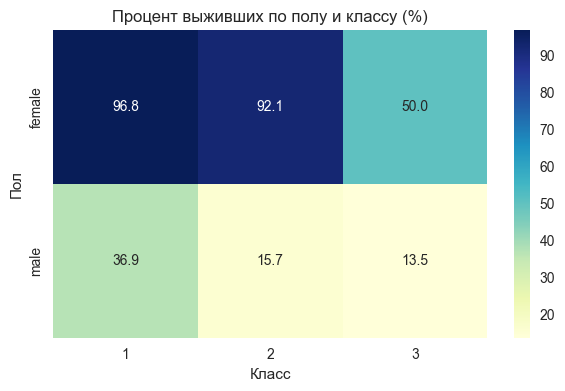

Pclass,1,2,3
Sex,,,
female,96.8,92.1,50.0
male,36.9,15.7,13.5


In [18]:
# Сводная таблица

survival_rate=df_clean.groupby(['Sex','Pclass'])['Survived'].mean().unstack()
survival_rate_percent= (survival_rate *100).round(1)

plt.figure(figsize=(7,4))
sns.heatmap(survival_rate_percent,annot=True,fmt=".1f",cmap="YlGnBu")
plt.title('Процент выживших по полу и классу (%)')
plt.xlabel('Класс')
plt.ylabel('Пол')
plt.show()

# Выведем таблицу
survival_rate_percent